
This block imports necessary libraries and loads the COVID-19 demographic dataset from a CSV file. It then displays the first five rows of the dataset to preview its structure and content.


In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [38]:

# Load the dataset
df = pd.read_csv("/content/C19_Demographic_Cleaned.csv")
df.head()


,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days,Bivalent_Booster,Bivalent_Booster_Pop_Pct_agegroup,Bivalent_Booster_Pop_Pct_known
0,5/10/2023,Race_eth_NHAIAN,"1,911,855",0.9,0.7,"1,588,653",78.5,65.2,0.9,0.7,...,914,50.1,0.6,0.5,0.9,"202,047",592,"378,599",15.5,0.7
1,5/10/2023,Age_unknown,"9,344",0.0,0.0,"2,491",61.7,55.1,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0,0,0,8.4,0.0
2,5/10/2023,Race_eth_NHAsian,"13,983,704",6.8,5.2,"12,609,000",73.6,66.4,6.9,5.5,...,"6,400",56.2,6.1,5.5,7.1,"2,027,791","4,897","4,200,667",22.1,8.3
3,5/10/2023,Race_eth_NHMult_Oth,"12,665,103",6.2,4.7,"11,389,487",61.7,55.1,6.2,4.9,...,"4,837",54.9,6.1,5.6,6.0,"2,053,261","4,104","3,203,837",8.4,6.3
4,5/10/2023,Race_eth_NHBlack,"21,157,654",10.3,7.8,"18,545,870",51.3,45.0,10.1,8.0,...,"7,656",47.9,8.2,7.4,10.8,"2,727,568","7,417","3,900,005",9.5,7.7


In [39]:

# Clean comma-separated numbers to integers
for col in df.columns:
    if df[col].dtype == 'object' and df[col].str.contains(",", na=False).any():
        df[col] = df[col].str.replace(",", "").astype(float)


In [40]:

# Data structure and summary
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29886 entries, 0 to 29885
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     29886 non-null  object 
 1   Demographic_category                     29886 non-null  object 
 2   Administered_Dose1                       29886 non-null  float64
 3   Administered_Dose1_pct_known             29886 non-null  float64
 4   Administered_Dose1_pct_US                29886 non-null  float64
 5   Series_Complete_Yes                      29886 non-null  float64
 6   Administered_Dose1_pct_agegroup          29886 non-null  float64
 7   Series_Complete_Pop_pct_agegroup         29886 non-null  float64
 8   Series_Complete_Pop_Pct_known            29886 non-null  float64
 9   Series_Complete_Pop_Pct_US               29886 non-null  float64
 10  Booster_Doses_Vax_pct_agegroup           29886

**Code Block Functionality:** This code filters the dataset to include only selected racial/ethnic groups and visualizes the number of individuals who received Administered Dose 1 using a horizontal bar chart. The sns.barplot() function from Seaborn helps compare vaccination counts across these demographic groups.

**Graph Interpretation: **The graph shows that Race_eth_NHWhite had the highest number of individuals receiving the first dose of the vaccine, followed by Race_eth_Hispanic. Smaller groups like Race_eth_NHAIAN and Race_eth_NHNHOPI had relatively lower counts, highlighting disparities in vaccine administration across racial/ethnic demographics.

<ipython-input-41-b5444e66a5d6>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




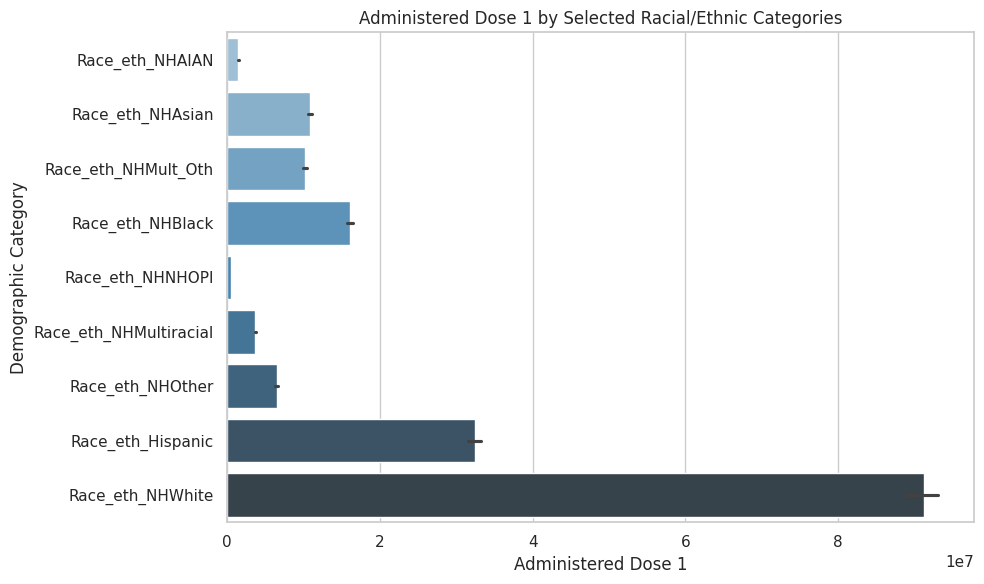

In [41]:
# Define the specific demographic categories to include
selected_categories = [
    "Race_eth_Hispanic",
    "Race_eth_NHAIAN",
    "Race_eth_NHAsian",
    "Race_eth_NHBlack",
    "Race_eth_NHMult_Oth",
    "Race_eth_NHMultiracial",
    "Race_eth_NHNHOPI",
    "Race_eth_NHOther",
    "Race_eth_NHWhite"
]

# Filter the DataFrame for those categories
filtered_df = df[df['Demographic_category'].isin(selected_categories)]

# Create the visualization
sns.barplot(data=filtered_df, y='Demographic_category', x='Administered_Dose1', palette='Blues_d')
plt.title("Administered Dose 1 by Selected Racial/Ethnic Categories")
plt.xlabel("Administered Dose 1")
plt.ylabel("Demographic Category")
plt.tight_layout()
plt.show()


**Code Block Functionality:** This block filters for specific racial/ethnic categories and visualizes how many individuals from each group completed the full COVID-19 vaccine series. The sns.barplot() function creates a horizontal bar chart using the Series_Complete_Yes metric, with a green color palette to indicate completion.

**Graph Interpretation:** The graph shows that Race_eth_NHWhite and Race_eth_Hispanic had the highest number of individuals completing their vaccine series. Meanwhile, groups like Race_eth_NHNHOPI and Race_eth_NHAIAN had the lowest completion counts, suggesting disparities in full vaccination rates among different ethnic groups

<ipython-input-42-5cf4842cc74f>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




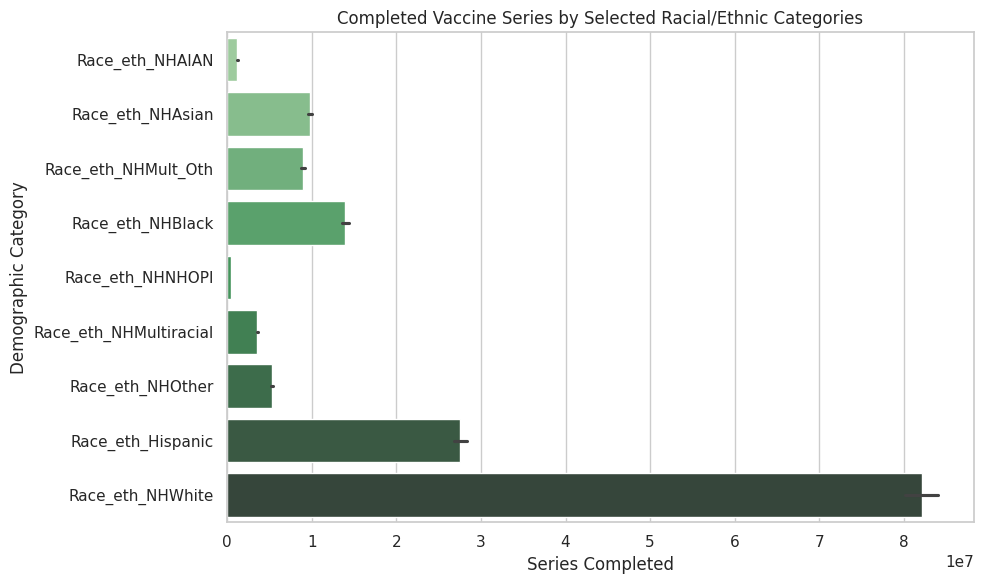

In [42]:
# Define the specific demographic categories to include
selected_categories = [
    "Race_eth_Hispanic",
    "Race_eth_NHAIAN",
    "Race_eth_NHAsian",
    "Race_eth_NHBlack",
    "Race_eth_NHMult_Oth",
    "Race_eth_NHMultiracial",
    "Race_eth_NHNHOPI",
    "Race_eth_NHOther",
    "Race_eth_NHWhite"
]

# Filter the DataFrame for those categories
filtered_df = df[df['Demographic_category'].isin(selected_categories)]

# Create the visualization
sns.barplot(data=filtered_df, y='Demographic_category', x='Series_Complete_Yes', palette='Greens_d')
plt.title("Completed Vaccine Series by Selected Racial/Ethnic Categories")
plt.xlabel("Series Completed")
plt.ylabel("Demographic Category")
plt.tight_layout()
plt.show()


**Code Block Functionality:** This code filters for the same racial/ethnic categories as before but focuses on the Bivalent Booster dose counts instead of the completed vaccine series. The barplot uses the 'Purples_d' palette to represent each group’s booster uptake visually.

**Graph Interpretation:**

    Race_eth_NHWhite again leads significantly in booster doses received, followed by Race_eth_Hispanic.

    All other categories show a considerably lower number of booster doses, with groups like Race_eth_NHNHOPI and Race_eth_NHAIAN showing the lowest uptake.

    This might reflect disparities in booster access, awareness, or trust in the healthcare system.

<ipython-input-43-b1ab2011ca27>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




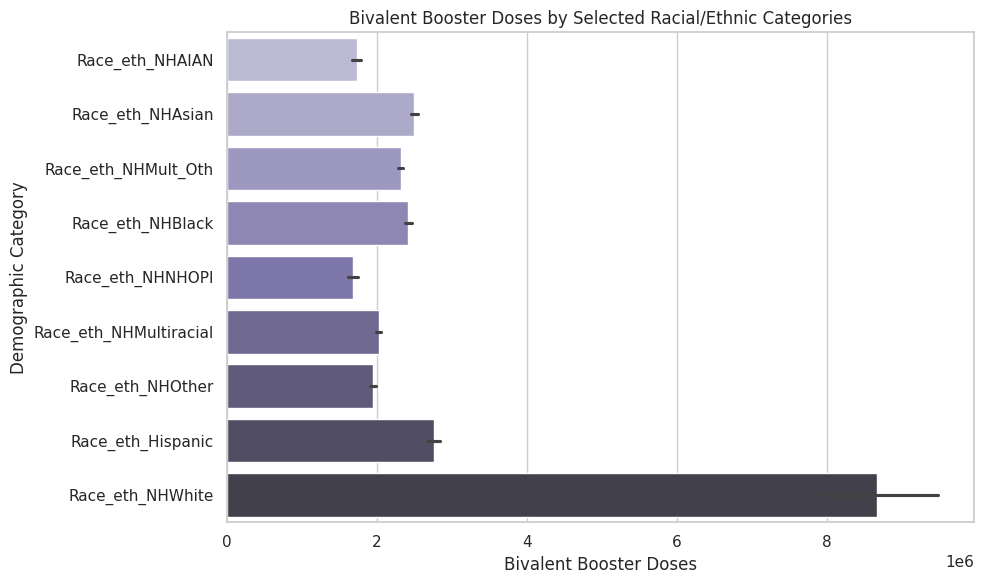

In [43]:
# Define the specific demographic categories to include
selected_categories = [
    "Race_eth_Hispanic",
    "Race_eth_NHAIAN",
    "Race_eth_NHAsian",
    "Race_eth_NHBlack",
    "Race_eth_NHMult_Oth",
    "Race_eth_NHMultiracial",
    "Race_eth_NHNHOPI",
    "Race_eth_NHOther",
    "Race_eth_NHWhite"
]

# Filter the DataFrame for those categories
filtered_df = df[df['Demographic_category'].isin(selected_categories)]

# Create the visualization
sns.barplot(data=filtered_df, y='Demographic_category', x='Bivalent_Booster', palette='Purples_d')
plt.title("Bivalent Booster Doses by Selected Racial/Ethnic Categories")
plt.xlabel("Bivalent Booster Doses")
plt.ylabel("Demographic Category")
plt.tight_layout()
plt.show()


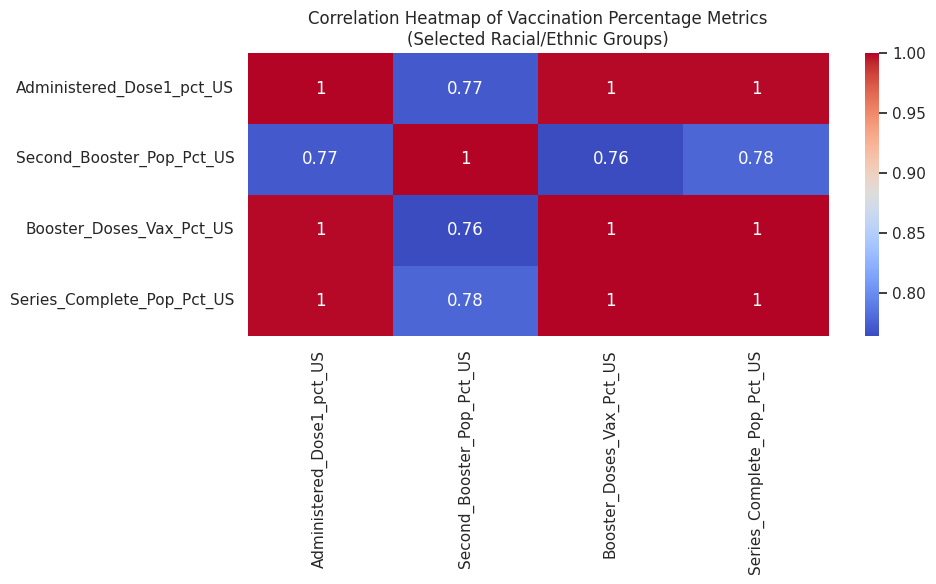

In [44]:
# Define the demographic categories to filter
selected_categories = [
    "Race_eth_Hispanic",
    "Race_eth_NHAIAN",
    "Race_eth_NHAsian",
    "Race_eth_NHBlack",
    "Race_eth_NHMult_Oth",
    "Race_eth_NHMultiracial",
    "Race_eth_NHNHOPI",
    "Race_eth_NHOther",
    "Race_eth_NHWhite"
]

# Filter the DataFrame
filtered_df = df[df['Demographic_category'].isin(selected_categories)]

# Select only the specific percentage-based columns
selected_columns = [
    "Administered_Dose1_pct_US",
    "Second_Booster_Pop_Pct_US",
    "Booster_Doses_Vax_Pct_US",
    "Series_Complete_Pop_Pct_US"
]

# Create correlation matrix
corr_matrix = filtered_df[selected_columns].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Vaccination Percentage Metrics\n(Selected Racial/Ethnic Groups)")
plt.tight_layout()
plt.show()




## 🔍 Key Insights:
- Certain demographic categories received significantly more doses.
- Completed vaccination series and booster doses vary widely by group.
- Correlation heatmap helps identify strongly related metrics like `Dose 1` and `Completed Series`.


**Code Summary:**
This code calculates the gap between Dose 1% and Series Completion% for each racial/ethnic group and visualizes it in a horizontal bar chart.

**Graph Insight:**

    NHWhite shows the largest drop-off, meaning many started vaccination but didn’t finish.

    Hispanic group is the only one with a positive gap, suggesting stronger follow-through or outreach.

    Smaller gaps in other groups imply more consistent vaccination behavior.

<ipython-input-45-167ce438fe4d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-167ce438fe4d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




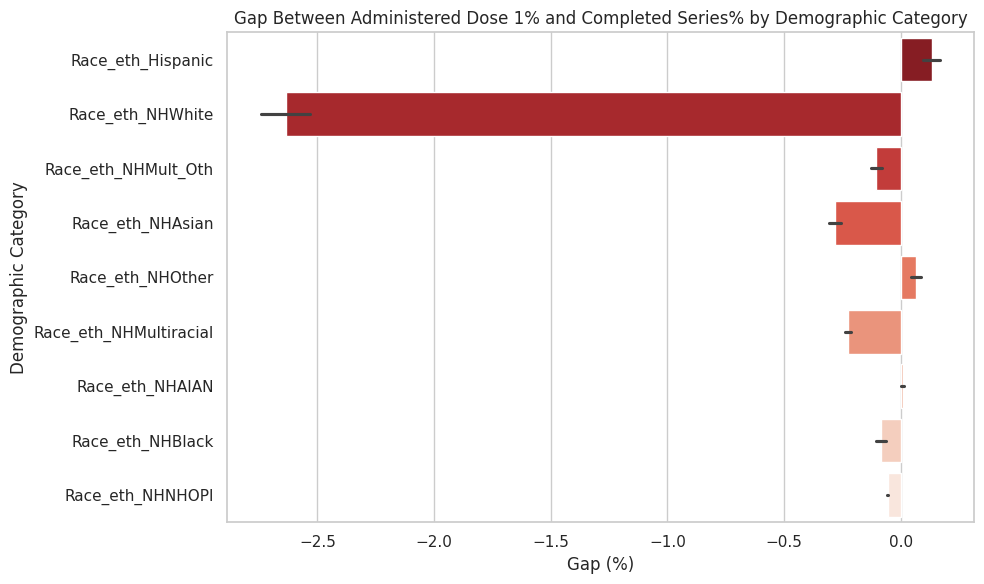

In [45]:
# Gap Analysis: Difference between Administered Dose 1 % and Completed Series %
filtered_df['Dose_Complete_Gap'] = filtered_df['Administered_Dose1_pct_US'] - filtered_df['Series_Complete_Pop_Pct_US']
filtered_df_sorted = filtered_df.sort_values('Dose_Complete_Gap', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df_sorted, y='Demographic_category', x='Dose_Complete_Gap', palette='Reds_r')
plt.title("Gap Between Administered Dose 1% and Completed Series% by Demographic Category")
plt.xlabel("Gap (%)")
plt.ylabel("Demographic Category")
plt.tight_layout()
plt.show()


**Code Summary:**
The code reshapes vaccination-related percentages for each demographic group and plots a grouped bar chart to compare vaccine and booster uptake.

**Graph Insights:**

    NHWhite group shows highest uptake across all vaccine stages, including boosters.

    Hispanic group shows good initial and series completion rates but lower booster uptake.

    Most other minority groups have low booster uptake, especially NHBlack, NHMultiracial, and NHNHOPI, indicating drop-off after initial doses.

    Booster doses generally trail behind initial and completed series in all demographics, showing a common gap in follow-through for boosters.

The code creates a bar chart comparing COVID-19 vaccine and booster dose uptake across different demographic groups in the U.S. The chart shows that Non-Hispanic White individuals have the highest uptake, while other groups—especially Black, Multiracial, and NHOPI—have significantly lower booster coverage.

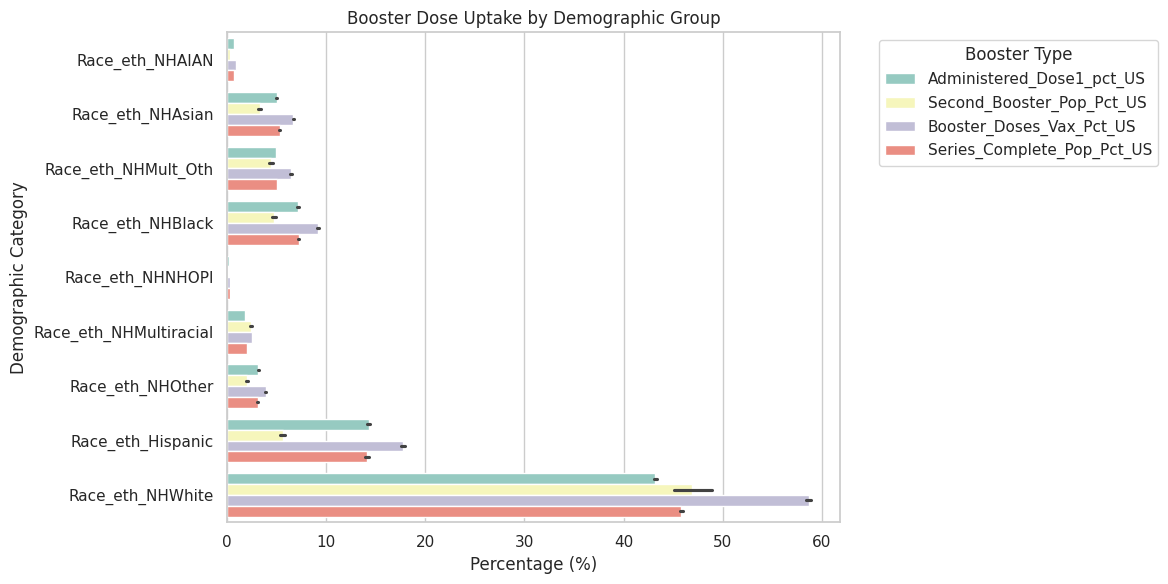

In [46]:

# Booster Uptake Comparison
booster_df = filtered_df[[
    'Demographic_category',
    'Administered_Dose1_pct_US',
    'Second_Booster_Pop_Pct_US',
    'Booster_Doses_Vax_Pct_US',
    'Series_Complete_Pop_Pct_US'
]].melt(id_vars='Demographic_category', var_name='Booster_Type', value_name='Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(data=booster_df, x='Percentage', y='Demographic_category', hue='Booster_Type', palette='Set3')
plt.title("Booster Dose Uptake by Demographic Group")
plt.xlabel("Percentage (%)")
plt.ylabel("Demographic Category")
plt.legend(title="Booster Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This code uses Plotly to create three interactive horizontal bar charts showing the distribution of COVID-19 vaccination data—dose 1, completed series, and bivalent boosters—across selected racial/ethnic groups. It visually highlights disparities in vaccine uptake, with Non-Hispanic White and Asian groups generally showing higher counts, while NHOPI, Multiracial, and Black groups show lower uptake

In [47]:
import plotly.express as px

# Define the specific demographic categories to include
selected_categories = [
    "Race_eth_Hispanic",
    "Race_eth_NHAIAN",
    "Race_eth_NHAsian",
    "Race_eth_NHBlack",
    "Race_eth_NHMult_Oth",
    "Race_eth_NHMultiracial",
    "Race_eth_NHNHOPI",
    "Race_eth_NHOther",
    "Race_eth_NHWhite"
]

# Filter the DataFrame
filtered_df = df[df['Demographic_category'].isin(selected_categories)]

# Interactive: Administered Dose 1
fig1 = px.bar(filtered_df,
              x='Administered_Dose1',
              y='Demographic_category',
              orientation='h',
              title='Administered Dose 1 by Selected Racial/Ethnic Categories',
              labels={'Administered_Dose1': 'Dose 1 Count'})
fig1.show()

# Interactive: Completed Vaccine Series
fig2 = px.bar(filtered_df,
              x='Series_Complete_Yes',
              y='Demographic_category',
              orientation='h',
              title='Completed Vaccine Series by Selected Racial/Ethnic Categories',
              labels={'Series_Complete_Yes': 'Series Completed'})
fig2.show()

# Interactive: Bivalent Booster
fig3 = px.bar(filtered_df,
              x='Bivalent_Booster',
              y='Demographic_category',
              orientation='h',
              title='Bivalent Booster Doses by Selected Racial/Ethnic Categories',
              labels={'Bivalent_Booster': 'Booster Doses'})
fig3.show()


**Code :**
The code maps detailed age ranges to broader groups like Children, Adolescents, Adults, and Seniors, then filters the data accordingly. It creates four bar plots to visualize vaccination metrics by age group using Seaborn.

**Graph Explanation:**

Seniors received the highest number of all vaccine doses, especially boosters, showing strong vaccination coverage. Children had the lowest vaccination rates, particularly for boosters, indicating limited uptake in younger age groups.

<ipython-input-48-d77cc65a8887>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-48-d77cc65a8887>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-48-d77cc65a8887>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-48-d77cc65a8887>:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




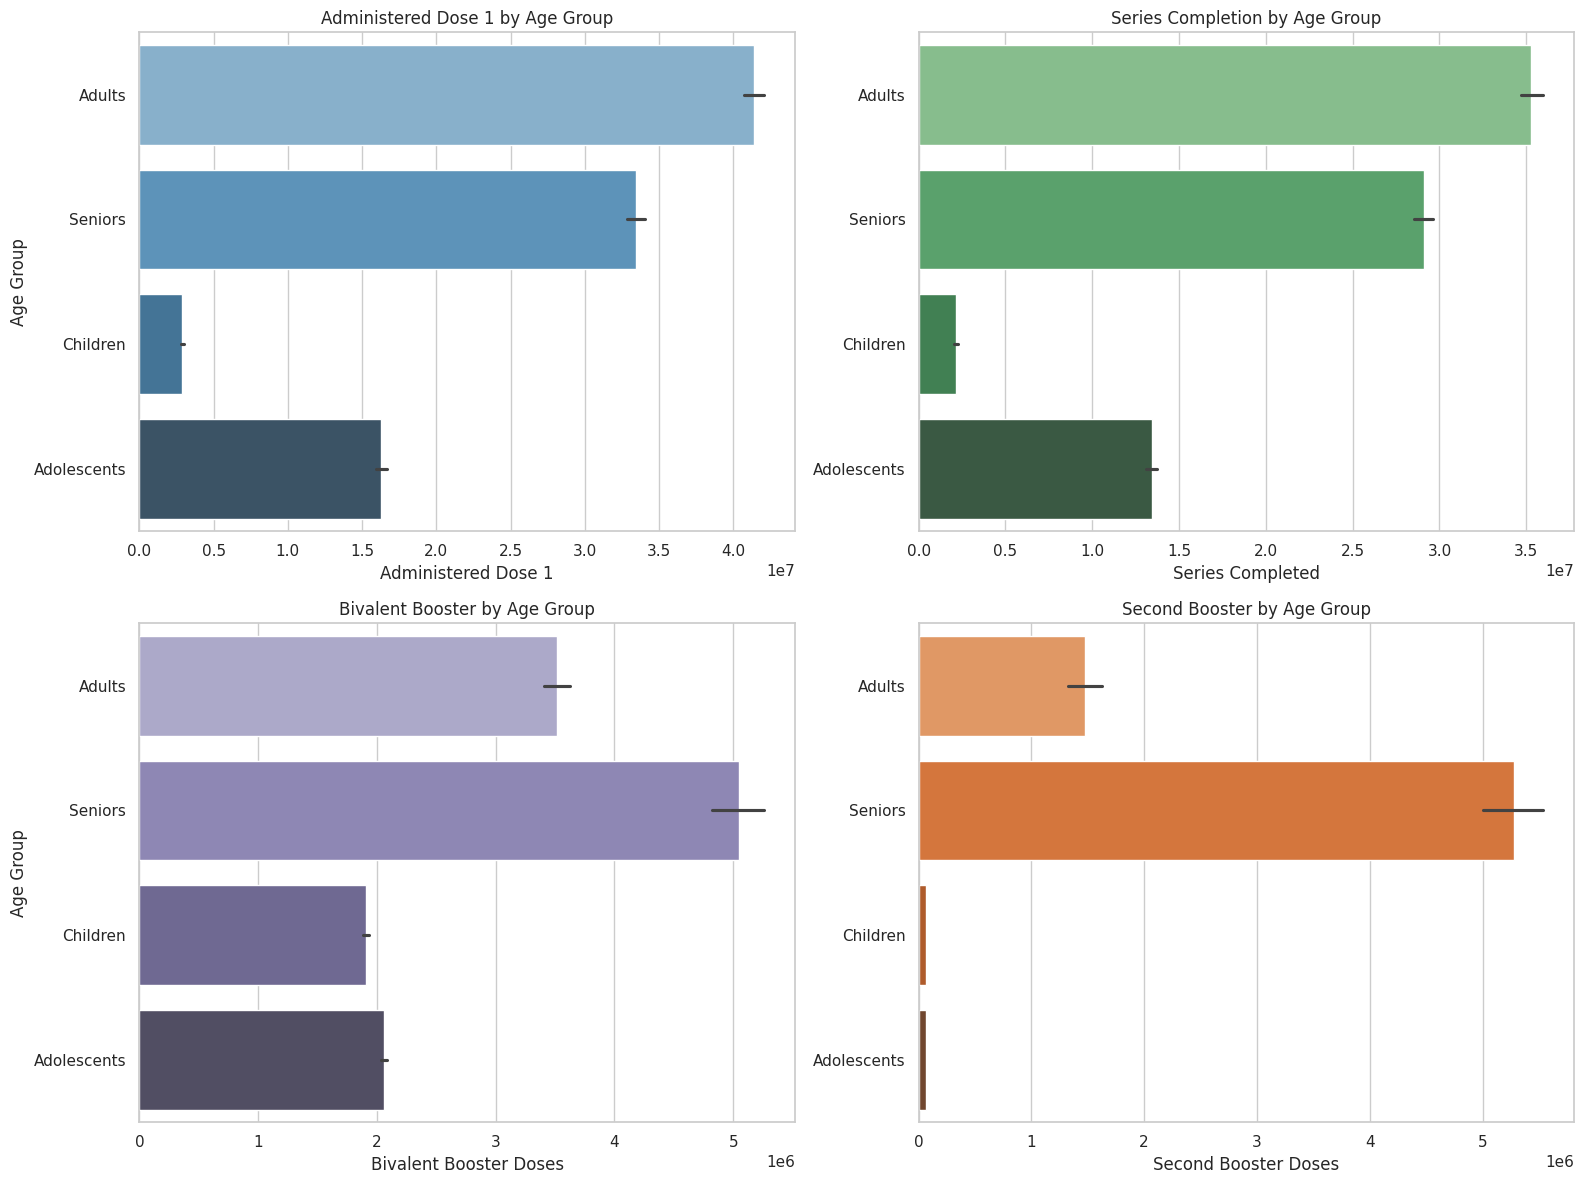

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the mapping from detailed age ranges to broader age groups
age_group_mapping = {
    'Ages_<2yrs': 'Children',
    'Ages_2-4_yrs': 'Children',
    'Ages_<5yrs': 'Children',
    'Ages_5-11_yrs': 'Children',
    'Ages_<12yrs': 'Children',
    'Ages_12-17_yrs': 'Adolescents',
    'Ages_18-24_yrs': 'Adolescents',
    'Ages_25-39_yrs': 'Adults',
    'Ages_40-49_yrs': 'Adults',
    'Ages_50-64_yrs': 'Adults',
    'Ages_65+_yrs': 'Seniors',
    'Ages_65-74_yrs': 'Seniors',
    'Ages_75+_yrs': 'Seniors'
}

# Step 2: Create a new column for Age Groups
df['Age_Group'] = df['Demographic_category'].map(age_group_mapping)

# Step 3: Filter only rows that have valid age groups
age_group_df = df[df['Age_Group'].notnull()]

# Step 4: Plotting vaccination metrics by Age Group
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Administered Dose 1
sns.barplot(data=age_group_df, x='Administered_Dose1', y='Age_Group', ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_title('Administered Dose 1 by Age Group')
axes[0, 0].set_xlabel('Administered Dose 1')
axes[0, 0].set_ylabel('Age Group')

# Series Complete
sns.barplot(data=age_group_df, x='Series_Complete_Yes', y='Age_Group', ax=axes[0, 1], palette='Greens_d')
axes[0, 1].set_title('Series Completion by Age Group')
axes[0, 1].set_xlabel('Series Completed')
axes[0, 1].set_ylabel('')

# Bivalent Booster
sns.barplot(data=age_group_df, x='Bivalent_Booster', y='Age_Group', ax=axes[1, 0], palette='Purples_d')
axes[1, 0].set_title('Bivalent Booster by Age Group')
axes[1, 0].set_xlabel('Bivalent Booster Doses')
axes[1, 0].set_ylabel('Age Group')

# Second Booster
sns.barplot(data=age_group_df, x='Second_Booster', y='Age_Group', ax=axes[1, 1], palette='Oranges_d')
axes[1, 1].set_title('Second Booster by Age Group')
axes[1, 1].set_xlabel('Second Booster Doses')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


Code Explanation:

    The code extracts the year from the 'Date' column and filters the dataset to include only data from 2020 to 2023 with valid age group information.

    It then groups the data by year and age group, summing the values for four key vaccination metrics, and uses seaborn to plot each over time in a 2x2 line chart layout.

Graph Explanation:

    Administered Dose 1: Adults received the highest number of first doses over the years, peaking in 2022, followed by a sharp decline in 2023. Seniors also show a similar pattern, while children and adolescents had lower and steadier trends.

    Series Completion: The trend mirrors Dose 1 with adults and seniors showing high completion in 2022, followed by a decline. Children and adolescents consistently had the lowest series completion rates.

    Bivalent Booster: Seniors steadily increased booster uptake, peaking in 2023, while children's booster numbers peaked in 2021 and then dropped significantly. Adults showed slow but steady growth, and adolescents remained relatively flat.

    Second Booster: Seniors again dominated uptake, especially in 2022, showing a sharp increase before a slight decline. Other age groups had much lower and flatter trends, with minimal changes year over year.

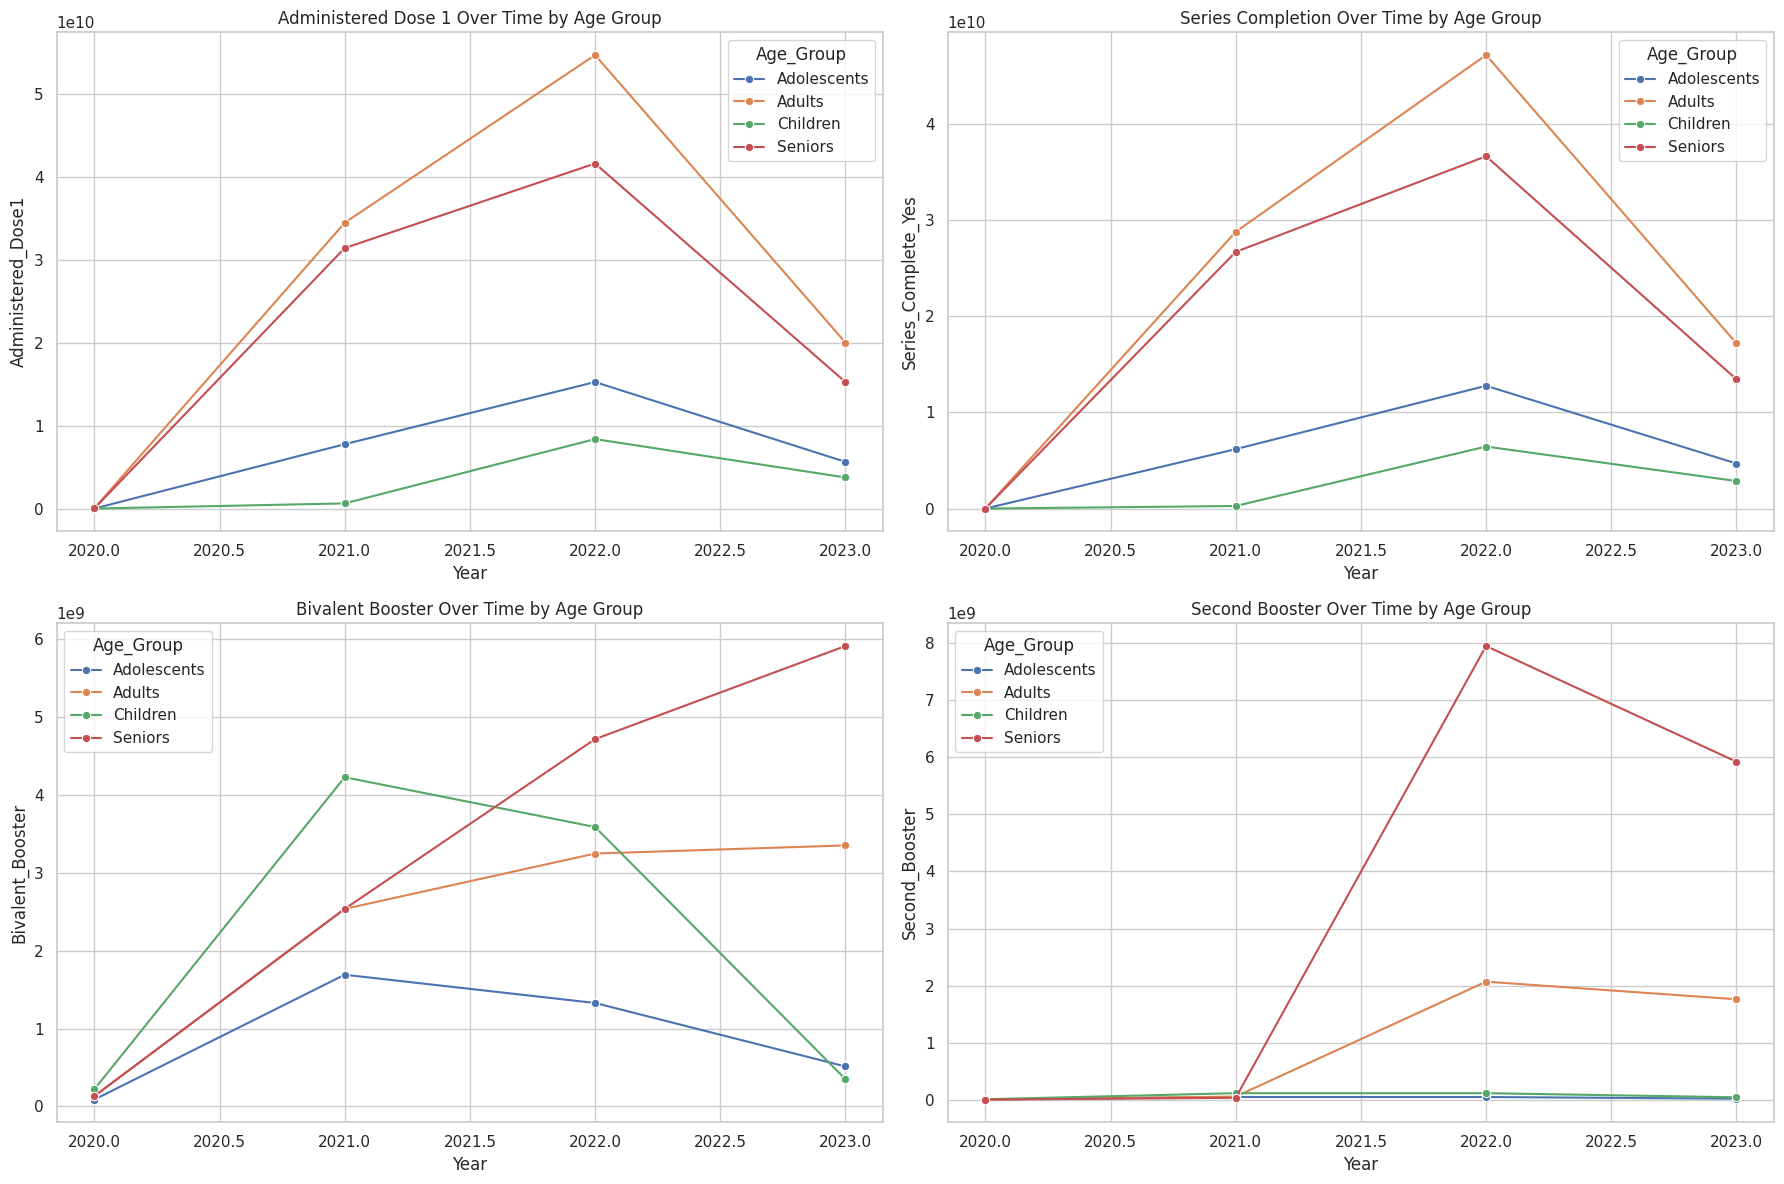

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure 'Year' column exists
df['Year'] = pd.to_datetime(df['Date']).dt.year  # Replace 'Date' with your actual column if needed

# Step 2: Filter data for years 2020-2023 and Age_Group not null
time_df = df[df['Year'].isin([2020, 2021, 2022, 2023]) & df['Age_Group'].notnull()]

# Step 3: Aggregate by Year and Age_Group
agg_df = time_df.groupby(['Year', 'Age_Group']).agg({
    'Administered_Dose1': 'sum',
    'Series_Complete_Yes': 'sum',
    'Bivalent_Booster': 'sum',
    'Second_Booster': 'sum'
}).reset_index()

# Step 4: Plotting line graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.set(style="whitegrid")

# Administered Dose 1
sns.lineplot(data=agg_df, x='Year', y='Administered_Dose1', hue='Age_Group', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Administered Dose 1 Over Time by Age Group')

# Series Complete
sns.lineplot(data=agg_df, x='Year', y='Series_Complete_Yes', hue='Age_Group', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Series Completion Over Time by Age Group')

# Bivalent Booster
sns.lineplot(data=agg_df, x='Year', y='Bivalent_Booster', hue='Age_Group', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Bivalent Booster Over Time by Age Group')

# Second Booster
sns.lineplot(data=agg_df, x='Year', y='Second_Booster', hue='Age_Group', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Second Booster Over Time by Age Group')

plt.tight_layout()
plt.show()


The bar plot shows that females consistently have slightly higher vaccination percentages than males across all metrics. The gap is most noticeable in Series Completed % and Booster Doses %, indicating stronger follow-through beyond the initial dose among females. Second Booster % uptake is low overall but still higher in females.

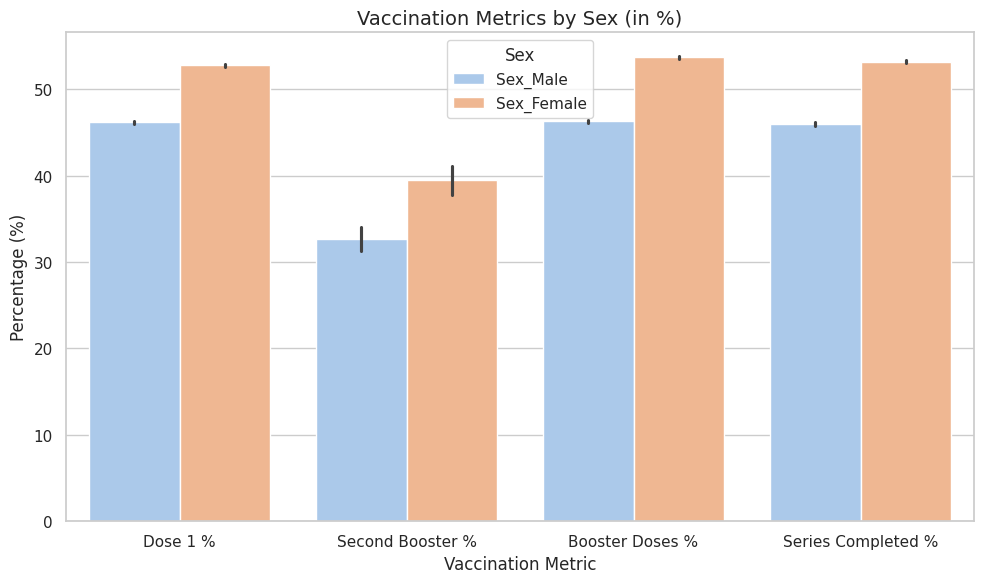

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for sex-based demographic groups
sex_df = df[df['Demographic_category'].isin(['Sex_Male', 'Sex_Female'])]

# Select relevant percentage columns and reshape the DataFrame for plotting
melted_sex = sex_df.melt(id_vars='Demographic_category',
                         value_vars=[
                             'Administered_Dose1_pct_US',
                             'Second_Booster_Pop_Pct_US',
                             'Booster_Doses_Vax_Pct_US',
                             'Series_Complete_Pop_Pct_US'
                         ],
                         var_name='Vaccination_Metric',
                         value_name='Percentage')

# Rename metrics for cleaner labels
metric_labels = {
    'Administered_Dose1_pct_US': 'Dose 1 %',
    'Second_Booster_Pop_Pct_US': 'Second Booster %',
    'Booster_Doses_Vax_Pct_US': 'Booster Doses %',
    'Series_Complete_Pop_Pct_US': 'Series Completed %'
}
melted_sex['Vaccination_Metric'] = melted_sex['Vaccination_Metric'].map(metric_labels)

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_sex,
            x='Vaccination_Metric',
            y='Percentage',
            hue='Demographic_category',
            palette='pastel')

plt.title('Vaccination Metrics by Sex (in %)', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Vaccination Metric')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


<ipython-input-51-2bc005753c59>:98: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-51-2bc005753c59>:98: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-51-2bc005753c59>:98: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-51-2bc005753c59>:98: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



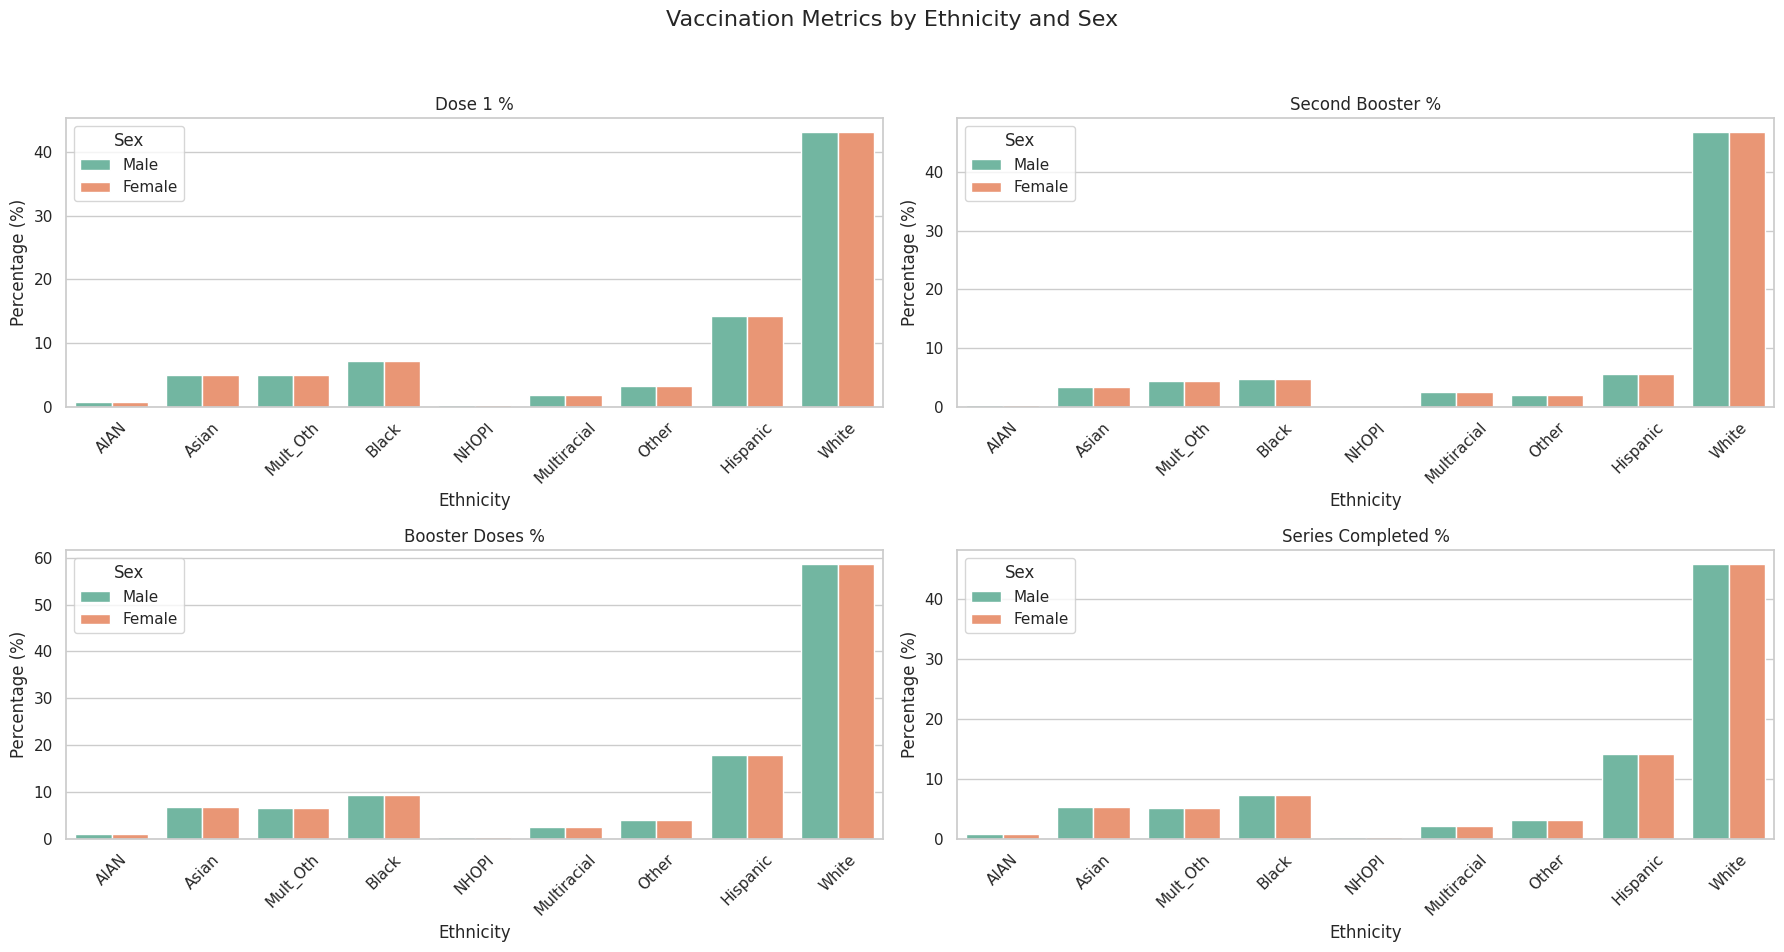

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only sex and ethnicity groups
target_groups = [
    'Race_eth_Hispanic', 'Race_eth_NHAIAN', 'Race_eth_NHAsian', 'Race_eth_NHBlack',
    'Race_eth_NHMult_Oth', 'Race_eth_NHMultiracial', 'Race_eth_NHNHOPI',
    'Race_eth_NHOther', 'Race_eth_NHWhite', 'Sex_Male', 'Sex_Female'
]

filtered_df = df[df['Demographic_category'].isin(target_groups)].copy()

# Label Mapping
label_map = {
    'Race_eth_Hispanic': 'Hispanic',
    'Race_eth_NHAIAN': 'AIAN',
    'Race_eth_NHAsian': 'Asian',
    'Race_eth_NHBlack': 'Black',
    'Race_eth_NHMult_Oth': 'Mult_Oth',
    'Race_eth_NHMultiracial': 'Multiracial',
    'Race_eth_NHNHOPI': 'NHOPI',
    'Race_eth_NHOther': 'Other',
    'Race_eth_NHWhite': 'White',
    'Sex_Male': 'Male',
    'Sex_Female': 'Female'
}
filtered_df['Label'] = filtered_df['Demographic_category'].map(label_map)

# Create a column indicating whether it's Sex or Ethnicity
filtered_df['Group_Type'] = filtered_df['Demographic_category'].apply(
    lambda x: 'Sex' if 'Sex_' in x else 'Ethnicity'
)

# Assign sex category — for ethnicity, we will duplicate to Male and Female if needed
filtered_df['Sex'] = filtered_df['Label'].apply(
    lambda x: 'Male' if x == 'Male' else ('Female' if x == 'Female' else 'Both')
)

# Get ethnicity groups only
ethnic_labels = filtered_df[filtered_df['Group_Type'] == 'Ethnicity']['Label'].unique()
sexes = ['Male', 'Female']

# Prepare combined data
metrics = [
    'Administered_Dose1_pct_US',
    'Second_Booster_Pop_Pct_US',
    'Booster_Doses_Vax_Pct_US',
    'Series_Complete_Pop_Pct_US'
]

plot_data = []

# Build dataset with Ethnicity + Sex breakdown
for eth in ethnic_labels:
    for sex in sexes:
        eth_subset = filtered_df[(filtered_df['Label'] == eth) & ((filtered_df['Sex'] == sex) | (filtered_df['Sex'] == 'Both'))]
        if not eth_subset.empty:
            entry = {
                'Ethnicity': eth,
                'Sex': sex,
            }
            for metric in metrics:
                entry[metric] = eth_subset[metric].mean()
            plot_data.append(entry)

plot_df = pd.DataFrame(plot_data)

# Melt the data for plotting
melted_df = plot_df.melt(id_vars=['Ethnicity', 'Sex'],
                         value_vars=metrics,
                         var_name='Vaccination_Metric',
                         value_name='Percentage')

# Rename for clarity
metric_labels = {
    'Administered_Dose1_pct_US': 'Dose 1 %',
    'Second_Booster_Pop_Pct_US': 'Second Booster %',
    'Booster_Doses_Vax_Pct_US': 'Booster Doses %',
    'Series_Complete_Pop_Pct_US': 'Series Completed %'
}
melted_df['Vaccination_Metric'] = melted_df['Vaccination_Metric'].map(metric_labels)

# Plot: Create subplots for each metric
sns.set(style="whitegrid")
metrics_ordered = list(metric_labels.values())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_ordered):
    ax = axes[i]
    sns.barplot(data=melted_df[melted_df['Vaccination_Metric'] == metric],
                x='Ethnicity', y='Percentage', hue='Sex', palette='Set2', ax=ax)
    ax.set_title(metric)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Ethnicity')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.suptitle('Vaccination Metrics by Ethnicity and Sex', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # adjust for suptitle
plt.show()


Graph Explanation:
Each histogram shows the distribution of vaccination percentages across males and females.

    Dose 1 %: Both sexes had similar lower-frequency distributions, but males slightly dominated the higher end.

    Second Booster %: Most data points are concentrated below 10% for both sexes, with a few high-percentage outliers, more prominent in males.

    Booster Doses %: Males again show slightly higher frequencies in mid-to-high ranges, but both sexes share similar shapes.

    Series Completed %: Distribution is mostly low, with males marginally exceeding females in the 40%+ range.

These suggest subtle differences in vaccine uptake by sex, with males often skewing toward higher percentages.

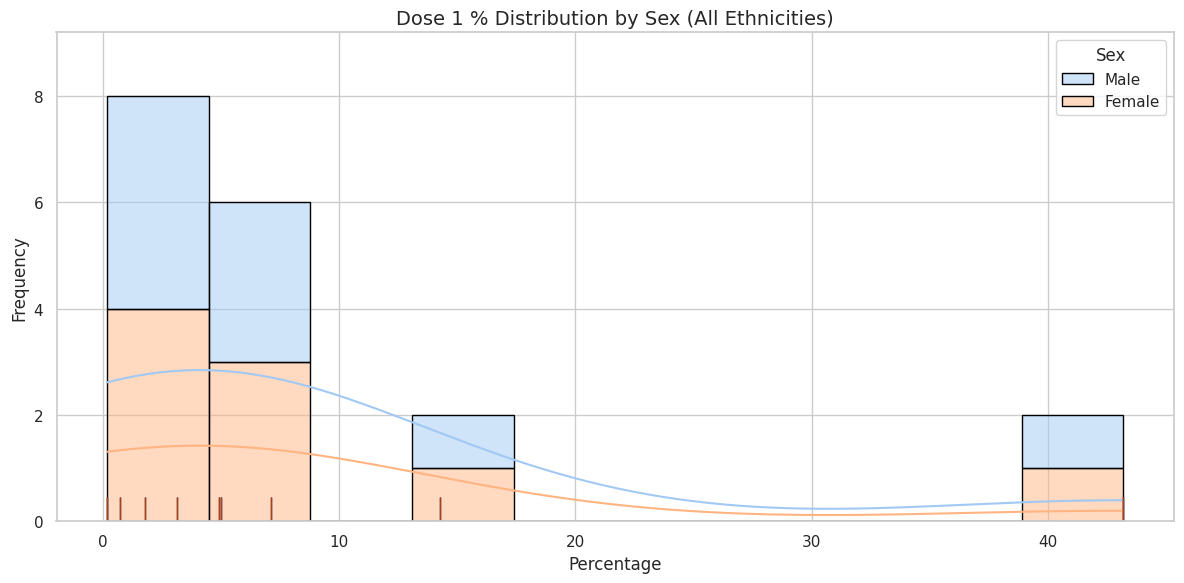

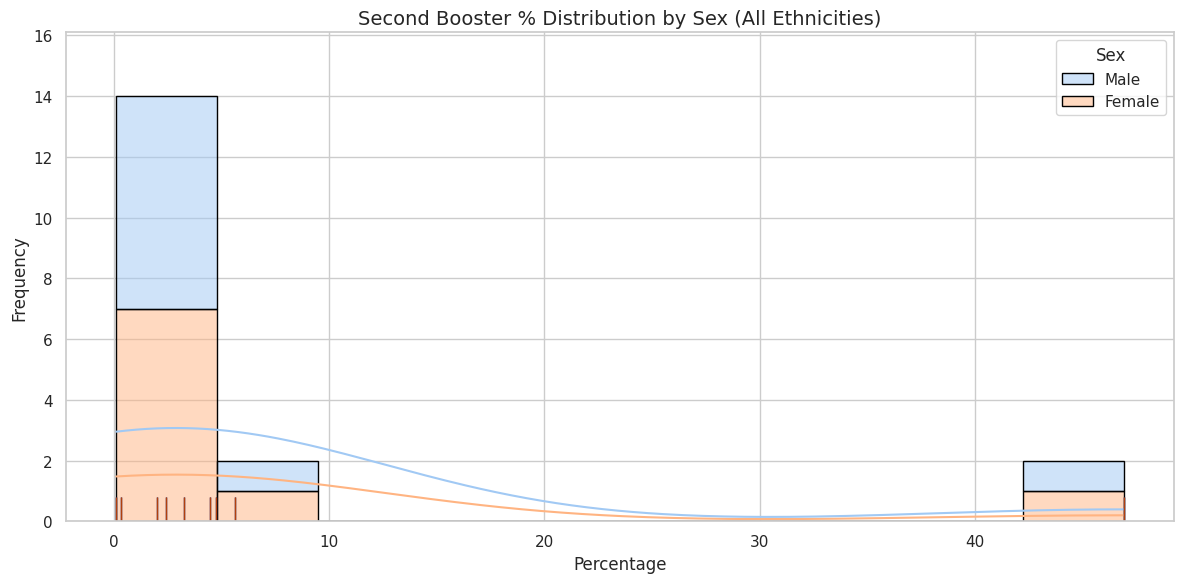

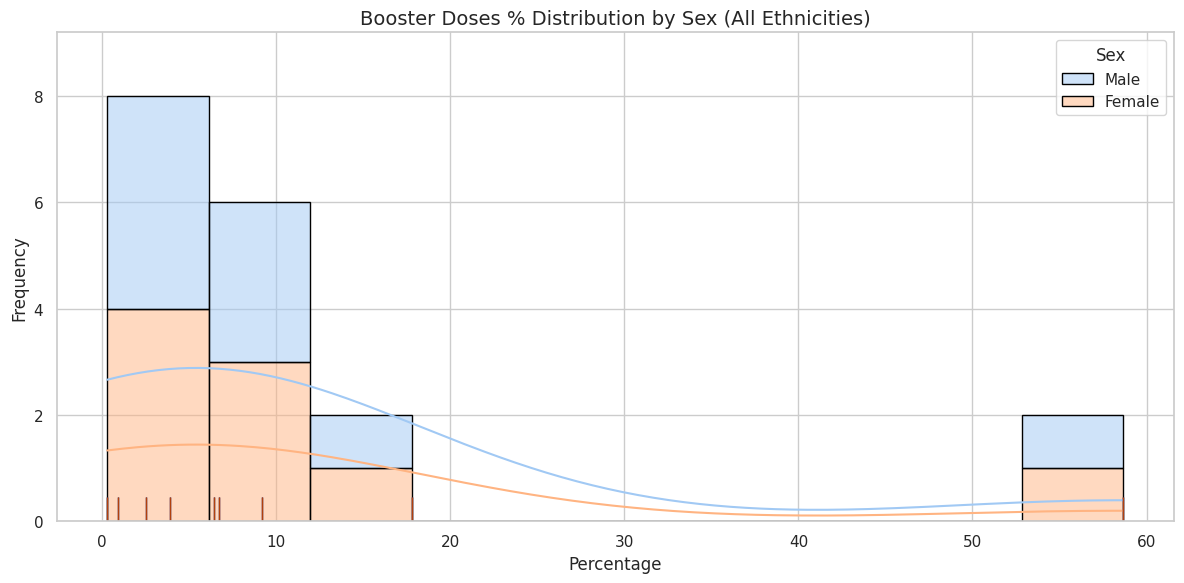

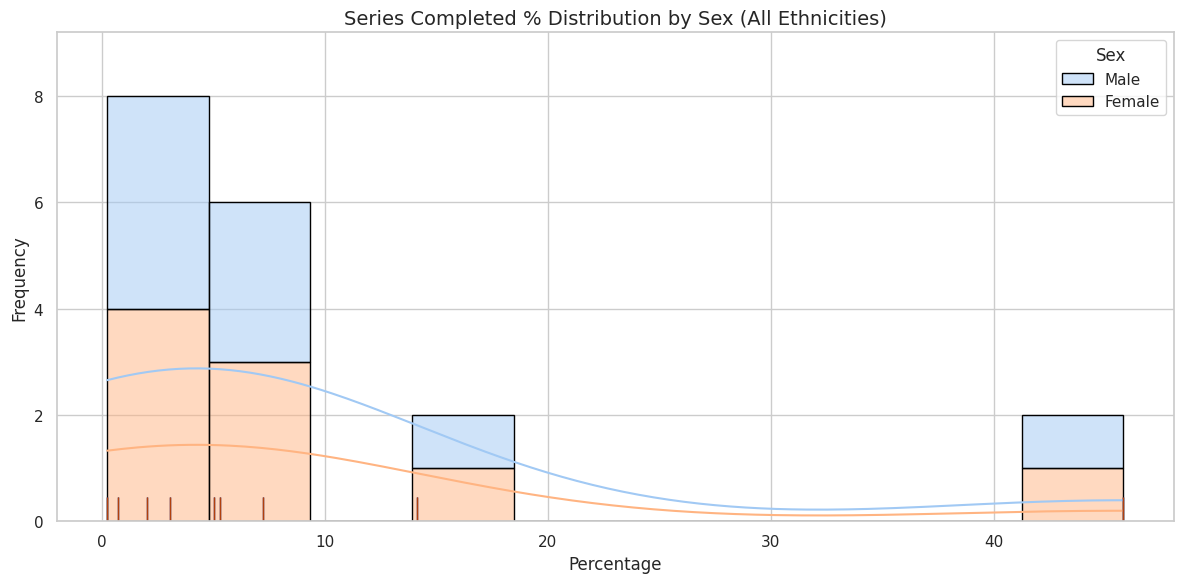

In [52]:
# histplot with rugplot
#Loop through metrics again
for metric in ['Administered_Dose1_pct_US',
               'Second_Booster_Pop_Pct_US',
               'Booster_Doses_Vax_Pct_US',
               'Series_Complete_Pop_Pct_US']:

    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=melted_df[melted_df['Vaccination_Metric'] == metric_labels[metric]],
        x='Percentage',
        hue='Sex',
        multiple='stack',
        kde=True,
        palette='pastel',
        bins=10,
        edgecolor='black'
    )

    # Add rugplot manually for better visibility
    sns.rugplot(
        data=melted_df[melted_df['Vaccination_Metric'] == metric_labels[metric]],
        x='Percentage',
        hue='Sex',
        palette='dark',
        height=0.05,
        legend=False
    )

    plt.title(f"{metric_labels[metric]} Distribution by Sex (All Ethnicities)", fontsize=14)
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
